In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DadosHistoricos_Ibovespa.csv')

print(df.head())


         Data   Último  Abertura   Máxima   Mínima   Vol.    Var%
0  16.06.2025  139.256   137.212  139.988  137.212  7,62M   1,49%
1  13.06.2025  137.213   137.800  137.800  136.586  8,63B  -0,43%
2  12.06.2025  137.800   137.127  137.931  136.175  7,12B   0,49%
3  11.06.2025  137.128   136.443  137.531  135.628  8,77B   0,51%
4  10.06.2025  136.436   135.716  137.369  135.716  8,19B   0,54%


In [3]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,16.06.2025,139.256,137.212,139.988,137.212,"7,62M","1,49%"
1,13.06.2025,137.213,137.800,137.800,136.586,"8,63B","-0,43%"
2,12.06.2025,137.800,137.127,137.931,136.175,"7,12B","0,49%"
3,11.06.2025,137.128,136.443,137.531,135.628,"8,77B","0,51%"
4,10.06.2025,136.436,135.716,137.369,135.716,"8,19B","0,54%"


In [4]:
df.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2477,19.06.2015,53.749,54.236,54.236,53.479,"2,95M","-0,90%"
2478,18.06.2015,54.239,53.251,54.352,53.214,"2,75M","1,86%"
2479,17.06.2015,53.249,53.698,53.755,52.965,"3,09M","-0,84%"
2480,16.06.2015,53.702,53.144,53.969,53.107,"3,38M","1,06%"
2481,15.06.2015,53.138,53.338,53.338,52.548,"2,69M","-0,39%"


In [5]:
df.shape

(2482, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      2482 non-null   object 
 1   Último    2482 non-null   float64
 2   Abertura  2482 non-null   float64
 3   Máxima    2482 non-null   float64
 4   Mínima    2482 non-null   float64
 5   Vol.      2481 non-null   object 
 6   Var%      2482 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.9+ KB


In [7]:
# Conversão object para data sem horario
df["Data"] = pd.to_datetime(df['Data'], format='%d.%m.%Y', dayfirst=True).dt.strftime('%Y-%m-%d')


In [8]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-06-16,139.256,137.212,139.988,137.212,"7,62M","1,49%"
1,2025-06-13,137.213,137.800,137.800,136.586,"8,63B","-0,43%"
2,2025-06-12,137.800,137.127,137.931,136.175,"7,12B","0,49%"
3,2025-06-11,137.128,136.443,137.531,135.628,"8,77B","0,51%"
4,2025-06-10,136.436,135.716,137.369,135.716,"8,19B","0,54%"


In [9]:
df.sort_values(by='Data', ascending=True, inplace=True)

In [10]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2481,2015-06-15,53.138,53.338,53.338,52.548,"2,69M","-0,39%"
2480,2015-06-16,53.702,53.144,53.969,53.107,"3,38M","1,06%"
2479,2015-06-17,53.249,53.698,53.755,52.965,"3,09M","-0,84%"
2478,2015-06-18,54.239,53.251,54.352,53.214,"2,75M","1,86%"
2477,2015-06-19,53.749,54.236,54.236,53.479,"2,95M","-0,90%"


In [11]:
# Função para converter Vol. com sufixos K, M e B
def convert_volume(value):
    value = str(value).replace('.', '')  # Remove pontos como separador de milhar
    if 'K' in value:
        return float(value.replace('K', '').replace(',', '.')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '').replace(',', '.')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '').replace(',', '.')) * 1000000000
    else:
        return float(value.replace(',', '.'))

# Aplicar a conversão para Vol.
df['Vol.'] = df['Vol.'].apply(convert_volume)

# Converter Var% diretamente para float, removendo % e substituindo , por .
df['Var%'] = df['Var%'].str.replace('%', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Exibir o resultado
print(df[['Vol.', 'Var%']])

              Vol.  Var%
2481  2.690000e+06 -0.39
2480  3.380000e+06  1.06
2479  3.090000e+06 -0.84
2478  2.750000e+06  1.86
2477  2.950000e+06 -0.90
...            ...   ...
4     8.190000e+09  0.54
3     8.770000e+09  0.51
2     7.120000e+09  0.49
1     8.630000e+09 -0.43
0     7.620000e+06  1.49

[2482 rows x 2 columns]


In [12]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2481,2015-06-15,53.138,53.338,53.338,52.548,2690000.0,-0.39
2480,2015-06-16,53.702,53.144,53.969,53.107,3380000.0,1.06
2479,2015-06-17,53.249,53.698,53.755,52.965,3090000.0,-0.84
2478,2015-06-18,54.239,53.251,54.352,53.214,2750000.0,1.86
2477,2015-06-19,53.749,54.236,54.236,53.479,2950000.0,-0.90


In [13]:
df['Último'] = df['Último'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Abertura'] = df['Abertura'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Máxima'] = df['Máxima'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Mínima'] = df['Mínima'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
#df['Vol.'] = df['Vol.'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [14]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2481,2015-06-15,53138.0,53338.0,53338.0,52548.0,2690000.0,-0.39
2480,2015-06-16,53702.0,53144.0,53969.0,53107.0,3380000.0,1.06
2479,2015-06-17,53249.0,53698.0,53755.0,52965.0,3090000.0,-0.84
2478,2015-06-18,54239.0,53251.0,54352.0,53214.0,2750000.0,1.86
2477,2015-06-19,53749.0,54236.0,54236.0,53479.0,2950000.0,-0.90


In [15]:
# Criação Variação Percentual Diária baseada na coluna Último
df['pct_change'] = (df['Último'].pct_change() * 100).round(2)

In [16]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,pct_change
2481,2015-06-15,53138.0,53338.0,53338.0,52548.0,2690000.0,-0.39,NaN
2480,2015-06-16,53702.0,53144.0,53969.0,53107.0,3380000.0,1.06,1.06
2479,2015-06-17,53249.0,53698.0,53755.0,52965.0,3090000.0,-0.84,-0.84
2478,2015-06-18,54239.0,53251.0,54352.0,53214.0,2750000.0,1.86,1.86
2477,2015-06-19,53749.0,54236.0,54236.0,53479.0,2950000.0,-0.90,-0.90


In [17]:
# Médias moveis
df['ma_5'] = df['Último'].rolling(window=5).mean()
df['ma_10'] = df['Último'].rolling(window=10).mean()
df['ma_20'] = df['Último'].rolling(window=20).mean()

In [18]:
# Indicadores Técnicos (RSI e MACD)
from ta.momentum import RSIIndicator
from ta.trend import MACD


In [19]:
# RSI
rsi = RSIIndicator(close=df['Último'], window=14)
df['rsi_14'] = rsi.rsi()

In [20]:
# MACD
macd = MACD(close=df['Último'])
df['macd'] = macd.macd()
df['macd_signal'] = macd.macd_signal()
df['macd_diff'] = macd.macd_diff()

In [21]:
# Criação da Coluna Target Binária, previsão se o fechamento do dia seguinte será maior que o de hoje
df['target'] = (df['Último'].shift(-1) > df['Último']).astype(int)


In [22]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,pct_change,ma_5,ma_10,ma_20,rsi_14,macd,macd_signal,macd_diff,target
2481,2015-06-15,53138.0,53338.0,53338.0,52548.0,2690000.0,-0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2480,2015-06-16,53702.0,53144.0,53969.0,53107.0,3380000.0,1.06,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2479,2015-06-17,53249.0,53698.0,53755.0,52965.0,3090000.0,-0.84,-0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2478,2015-06-18,54239.0,53251.0,54352.0,53214.0,2750000.0,1.86,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2477,2015-06-19,53749.0,54236.0,54236.0,53479.0,2950000.0,-0.90,-0.90,53615.4,NaN,NaN,NaN,NaN,NaN,NaN,1


In [23]:
df.dropna(inplace=True)

In [24]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,pct_change,ma_5,ma_10,ma_20,rsi_14,macd,macd_signal,macd_diff,target
2448,2015-07-31,50865.0,49897.0,50895.0,49892.0,3140000.0,1.94,1.94,49869.0,45130.4,46479.90,51.412441,-334.274750,-1960.961958,1626.687207,0
2447,2015-08-03,50138.0,50867.0,50867.0,50054.0,2690000.0,-1.43,-1.43,50149.4,50092.6,46360.85,51.030447,-116.440638,-1592.057694,1475.617055,0
2446,2015-08-04,50058.0,50138.0,50574.0,49827.0,2750000.0,-0.16,-0.16,50240.6,49951.0,46256.30,50.985554,49.172306,-1263.811694,1312.984000,1
2445,2015-08-05,50287.0,50067.0,50853.0,50067.0,2750000.0,0.46,0.46,50249.0,49888.1,46153.45,51.118118,196.633475,-971.722660,1168.356135,0
2444,2015-08-06,50011.0,5028.0,50534.0,49624.0,3750000.0,-0.55,-0.55,50271.8,49908.5,46064.90,50.939299,287.907799,-719.796568,1007.704367,0


In [25]:
# Separação dos dados para treinamento e teste
# Separando os últimos 30 dias para teste
test_size = 30

df_train = df.iloc[:-test_size]
df_test = df.iloc[-test_size:]

In [26]:
# Colunas usadas no modelo

feature_cols = ['pct_change', 'ma_5', 'ma_10', 'ma_20', 'rsi_14', 'macd', 'macd_signal', 'macd_diff']

X_train = df_train[feature_cols]
y_train = df_train['target']

x_test = df_test[feature_cols]
y_test = df_test['target']

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

In [28]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,pct_change,ma_5,ma_10,ma_20,rsi_14,macd,macd_signal,macd_diff,target
2448,2015-07-31,50865.0,49897.0,50895.0,49892.0,3140000.0,1.94,1.94,49869.0,45130.4,46479.90,51.412441,-334.274750,-1960.961958,1626.687207,0
2447,2015-08-03,50138.0,50867.0,50867.0,50054.0,2690000.0,-1.43,-1.43,50149.4,50092.6,46360.85,51.030447,-116.440638,-1592.057694,1475.617055,0
2446,2015-08-04,50058.0,50138.0,50574.0,49827.0,2750000.0,-0.16,-0.16,50240.6,49951.0,46256.30,50.985554,49.172306,-1263.811694,1312.984000,1
2445,2015-08-05,50287.0,50067.0,50853.0,50067.0,2750000.0,0.46,0.46,50249.0,49888.1,46153.45,51.118118,196.633475,-971.722660,1168.356135,0
2444,2015-08-06,50011.0,5028.0,50534.0,49624.0,3750000.0,-0.55,-0.55,50271.8,49908.5,46064.90,50.939299,287.907799,-719.796568,1007.704367,0


In [29]:
# Regressão Logística 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# modelos
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
# previsão
y_pred = model.predict(x_test)

# avaliação
acc = accuracy_score(y_test, y_pred)
print(f"Acuracia: {acc:.2%}")

print("\nMatriz de confusão: ")
print(confusion_matrix(y_test, y_pred))

print("\nRelatorio de classificação: ")
print(classification_report(y_test, y_pred))

Acuracia: 53.33%

Matriz de confusão: 
[[14  1]
 [13  2]]

Relatorio de classificação: 
              precision    recall  f1-score   support

           0       0.52      0.93      0.67        15
           1       0.67      0.13      0.22        15

    accuracy                           0.53        30
   macro avg       0.59      0.53      0.44        30
weighted avg       0.59      0.53      0.44        30



In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# previsão 
y_pred_rf = rf_model.predict(x_test)

In [33]:
# avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acuracia: {acc_rf:.2%}")

print("\nMatriz de confusão")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRelatorio de Classificação:")
print(classification_report(y_test, y_pred_rf))

Acuracia: 66.67%

Matriz de confusão
[[12  3]
 [ 7  8]]

Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30



In [34]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# modelo
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [35]:
# previsão
y_pred_xgb = xgb_model.predict(x_test)

# avaliação
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acuracia: {acc_xgb:2%}")

print("\nMatriz de confusão: ")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nRelatorio de Classificação:")
print(classification_report(y_test, y_pred_xgb))

Acuracia: 50.000000%

Matriz de confusão: 
[[6 9]
 [6 9]]

Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.50      0.60      0.55        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30



In [36]:
# Diferença entre as medias moveis

df['diff_ma5_ma10'] = df['ma_5'] - df['ma_10']
df['diff_ma10_ma20'] = df['ma_10'] - df['ma_20']

In [37]:
# fechamento vs media movel
df['close_vs_ma5'] = df['Último'] - df['ma_20']
df['close_vs_ma20'] = df['Último'] - df['ma_20']

In [38]:
# Desvio Padrão Móvel
df['std_5'] = df['Último'].rolling(window=5).std()
df['std_10'] = df['Último'].rolling(window=10).std()

In [39]:
# Volatilidade relativa (desvio padrão sobre média)
df['volatility_5'] = df['std_5'] / df['ma_5']
df['volatility_10'] = df['std_10'] / df['ma_10']

In [40]:
# Medida de aceleração ou desaceleração do mercado.
df['momentum_3'] = df['Último'] - df['Último'].shift(3)
df['momentum_5'] = df['Último'] - df['Último'].shift(5)

In [41]:
#MACD - Cruzamento (cruzamento de tendencia)
df['macd_cross'] = df['macd'] - df['macd_signal']

In [42]:
df.dropna(inplace=True)

In [43]:
feature_cols = [
    'pct_change', 'ma_5', 'ma_10', 'ma_20',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff',
    'diff_ma5_ma10', 'diff_ma10_ma20',
    'close_vs_ma5', 'close_vs_ma20',
    'std_5', 'std_10',
    'volatility_5', 'volatility_10',
    'momentum_3', 'momentum_5',
    'macd_cross'
]

In [44]:
# separar o ultimo mês para teste
test_size = 30
df_train = df.iloc[:-test_size]
df_test = df.iloc[-test_size:]

In [45]:
# separando variavel e alvo
X_train = df_train[feature_cols]
y_train = df_train['target']
x_test = df_test[feature_cols]
y_test = df_test['target']

In [46]:
# novamente treinando random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#modelos 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
#previsão
y_pred_rf = rf_model.predict(x_test)

# Avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acuracia: {acc_rf:.2%}")

print("\nMatriz de confusão: ")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRelatorio de classificação: ")
print(classification_report(y_test, y_pred_rf))

Acuracia: 46.67%

Matriz de confusão: 
[[7 8]
 [8 7]]

Relatorio de classificação: 
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        15
           1       0.47      0.47      0.47        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.47        30
weighted avg       0.47      0.47      0.47        30



In [48]:
# testando features mais úteis

feature_cols = [
    'pct_change',
    'ma_5', 'ma_10', 'ma_20',
    'rsi_14', 'macd', 'macd_signal',
    'diff_ma5_ma10', 'close_vs_ma5',
    'volatility_5'
]


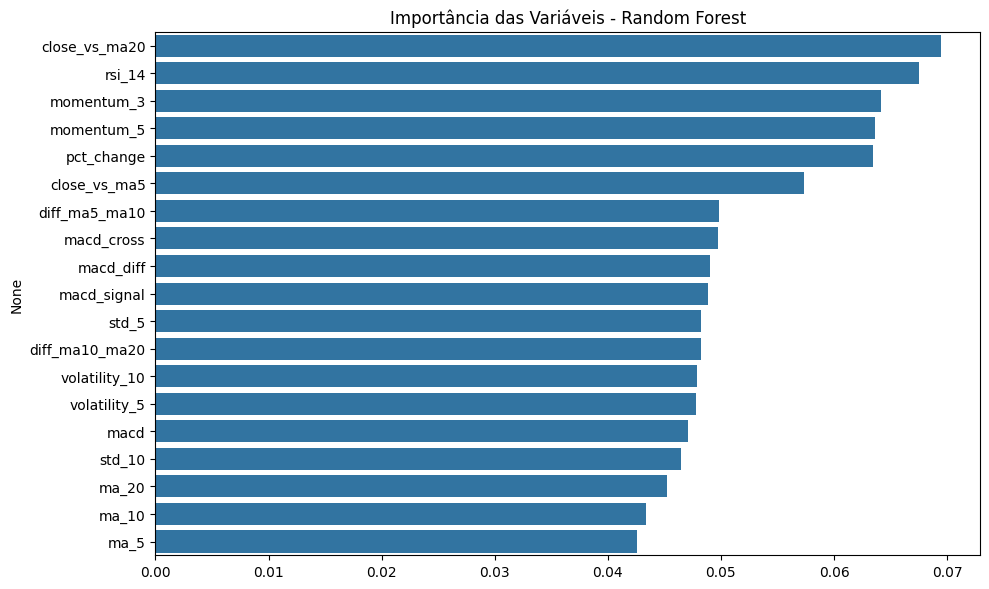

In [49]:

# Importância das variáveis
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Importância das Variáveis - Random Forest")
plt.tight_layout()
plt.show()


In [50]:
# reduzindo o conjunto de features 
feature_cols = [
    'close_vs_ma20', 'rsi_14', 'momentum_3', 'momentum_5',
    'pct_change', 'close_vs_ma5', 'diff_ma5_ma10', 'macd_cross'
]


In [51]:
X_train = df_train[feature_cols]
X_test = df_test[feature_cols]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.5
[[10  5]
 [10  5]]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.50      0.33      0.40        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30



In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definindo o grid de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Instancia o modelo base
rf_base = RandomForestClassifier(random_state=42)

# GridSearch com validação cruzada de 3 folds
grid_search = GridSearchCV(estimator=rf_base,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Executa o ajuste nos dados de treino
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [53]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Testar no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Acurácia: {accuracy_score(y_test, y_pred_best):.2%}")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Melhores parâmetros encontrados:
{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Acurácia: 56.67%
[[15  0]
 [13  2]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        15
           1       1.00      0.13      0.24        15

    accuracy                           0.57        30
   macro avg       0.77      0.57      0.47        30
weighted avg       0.77      0.57      0.47        30



In [56]:
feature_cols = ['pct_change', 'ma_5', 'ma_10', 'ma_20', 'rsi_14', 'macd', 'macd_signal', 'macd_diff']

X_train = df_train[feature_cols]
y_train = df_train['target']

X_test = df_test[feature_cols]  # <- aqui estava x_test (com letra minúscula)
y_test = df_test['target']


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Avaliação
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2%}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Acurácia: 66.67%
[[12  3]
 [ 7  8]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30

Melhores parâmetros encontrados:
{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 6}
